In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA

In [2]:
dat = pd.read_csv('boxOffice.csv')

In [3]:
dat

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71


In [4]:
depvar = ['box']
tradindvar = ['G','PG','PG13','budget','starpowr','sequel','action','comedy','animated','horror']
buzzvar = ['addict','cmngsoon','fandango','cntwait3']

In [5]:
x = dat.copy()
x = x.drop(depvar, axis = 1)

In [6]:
x

,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49
1,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79
2,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36
3,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76
4,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70
58,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62
59,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53
60,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71


In [7]:
y = dat.copy()

y = y.drop(tradindvar, axis = 1)

y = y.drop(buzzvar, axis = 1)

In [8]:
y

,box
0,19167085
1,63106589
2,5401605
3,67528882
4,26223128
...,...
57,59321095
58,5329240
59,23004765
60,70950500


#### Plotting histograms of the continuous variables (box, budget, starpwr) to see if any transformations are needed

In [9]:
box = y.box
budget = x.budget
starpowr = x.starpowr

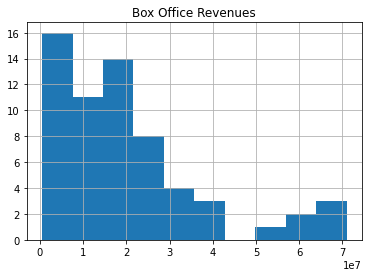

In [10]:
box.hist()
plt.title('Box Office Revenues')
plt.show()

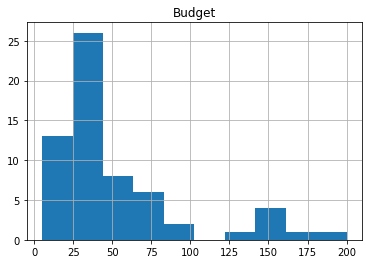

In [11]:
budget.hist()
plt.title('Budget')
plt.show()

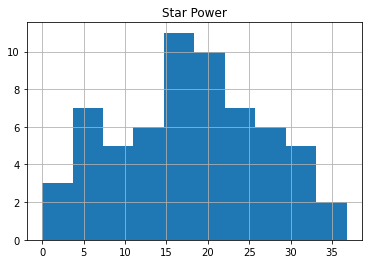

In [12]:
starpowr.hist()
plt.title('Star Power')
plt.show()

From the above 3 histograms of box, budget and starpower we can see that box and budget are right skewed. So applying log transformation to the box and budget. Starpower already looks normalized.

In [13]:
box = np.log(box)
budget = np.log(budget)

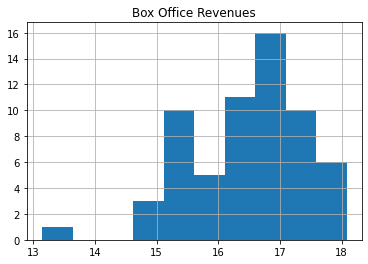

In [14]:
box.hist()
plt.title('Box Office Revenues')
plt.show()

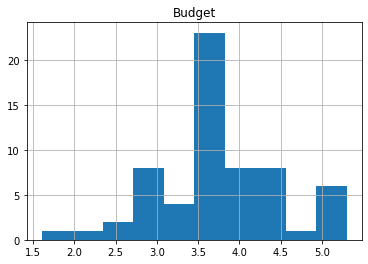

In [15]:
budget.hist()
plt.title('Budget')
plt.show()

In [16]:
y.box = box
x.budget = budget

After completing log transformation, the box and budget look normalized, now we can use these transformed variables in out model.

#### Running a linear regression of box office revenues on the “traditional” variables (i.e., using all the independent variables (except the “buzz” variables).

In [17]:
x1 = x.drop(buzzvar, axis = 1)

In [18]:
x1

,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror
0,0,0,0,3.332205,19.83,0,0,1,0,0
1,0,1,0,5.010635,32.69,1,0,0,1,0
2,0,0,0,3.621671,15.69,0,0,1,0,0
3,0,0,1,5.298317,23.62,1,1,0,0,0
4,0,1,0,5.010635,19.02,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,5.164786,34.86,0,0,0,1,0
58,0,0,1,3.091042,4.25,0,1,0,0,0
59,0,0,1,2.815409,5.96,0,0,0,0,1
60,0,0,1,4.442651,16.62,1,1,0,0,0


In [19]:
x1 = sm.add_constant(x1)
x1

,const,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror
0,1.0,0,0,0,3.332205,19.83,0,0,1,0,0
1,1.0,0,1,0,5.010635,32.69,1,0,0,1,0
2,1.0,0,0,0,3.621671,15.69,0,0,1,0,0
3,1.0,0,0,1,5.298317,23.62,1,1,0,0,0
4,1.0,0,1,0,5.010635,19.02,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,0,1,0,5.164786,34.86,0,0,0,1,0
58,1.0,0,0,1,3.091042,4.25,0,1,0,0,0
59,1.0,0,0,1,2.815409,5.96,0,0,0,0,1
60,1.0,0,0,1,4.442651,16.62,1,1,0,0,0


In [20]:
linregr_trad = sm.OLS(y,x1).fit()
print(linregr_trad.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Sun, 12 Feb 2023   Prob (F-statistic):             0.0109
Time:                        22:26:30   Log-Likelihood:                -70.832
No. Observations:                  62   AIC:                             163.7
Df Residuals:                      51   BIC:                             187.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5768      0.688     19.727      0.0

#### Running another linear regression using only the variables that are significant viz sequel, budget and horror (again, ignoring the “buzz” variables)


In [21]:
signi = x1.drop(['G','PG','PG13','starpowr','action','comedy','animated'], axis = 1)
signi

,const,budget,sequel,horror
0,1.0,3.332205,0,0
1,1.0,5.010635,1,0
2,1.0,3.621671,0,0
3,1.0,5.298317,1,0
4,1.0,5.010635,0,0
...,...,...,...,...
57,1.0,5.164786,0,0
58,1.0,3.091042,0,0
59,1.0,2.815409,0,1
60,1.0,4.442651,1,0


In [22]:
linregr_trad_signi = sm.OLS(y,signi).fit()

In [23]:
print(linregr_trad_signi.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           0.000162
Time:                        22:26:30   Log-Likelihood:                -73.175
No. Observations:                  62   AIC:                             154.4
Df Residuals:                      58   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8718      0.611     22.700      0.0

#### Plot histograms of the four “buzz” variables

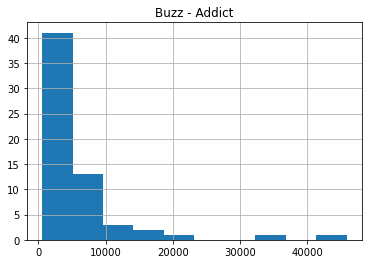

In [24]:
addict = x.addict
addict.hist()
plt.title('Buzz - Addict')
plt.show()

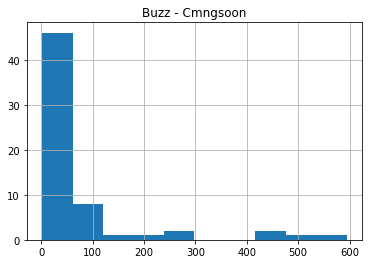

In [25]:
cmngsoon = x.cmngsoon
cmngsoon.hist()
plt.title('Buzz - Cmngsoon')
plt.show()

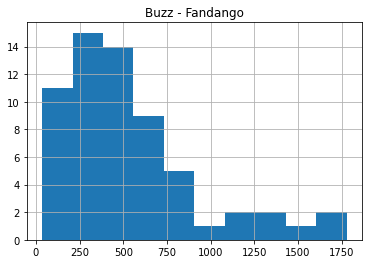

In [26]:
fandango = x.fandango
fandango.hist()
plt.title('Buzz - Fandango')
plt.show()

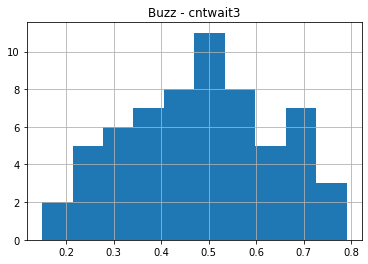

In [27]:
cntwait3 = x.cntwait3
cntwait3.hist()
plt.title('Buzz - cntwait3')
plt.show()

From the above histograms we can see that addict, cmngsoon and fandango are right skewed.
So applying log transforamtion to those 3 buzz variables.

In [28]:
addict = np.log(addict)
cmngsoon = np.log(cmngsoon)
fandango = np.log(fandango)

In [29]:
# Let us replace the original values with the transformed values.

x.addict = addict
x.cmngsoon = cmngsoon
x.fandango = fandango

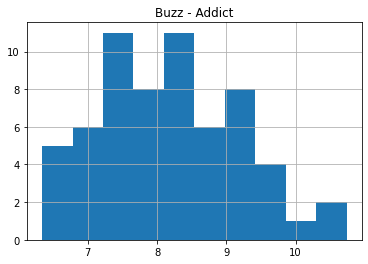

In [30]:
addict.hist()
plt.title('Buzz - Addict')
plt.show()

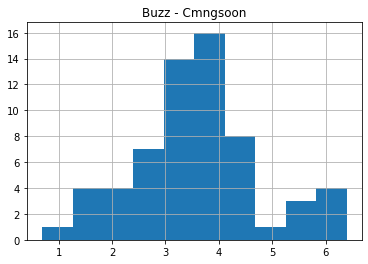

In [31]:
cmngsoon.hist()
plt.title('Buzz - Cmngsoon')
plt.show()

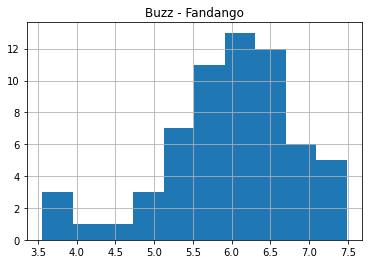

In [32]:
fandango.hist()
plt.title('Buzz - Fandango')
plt.show()

After log transformations we can see those variables are normalized and we can use them in our regression models now.

#### Running a linear regression of box office revenues on all the independent variables (transformed as needed)

In [33]:
x3 = x.copy()
x3 = sm.add_constant(x3)

linregr_ind = sm.OLS(y,x3).fit()
print(linregr_ind.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.77e-06
Time:                        22:26:30   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4958      0.993     11.581      0.0

#### Running another linear regression using only the variables that were significant, which are:
     a. PG
     b. action
     c. animated
     d. addict
     e. cntwait3

In [34]:
x3 = x3.drop(['G','PG13','budget','starpowr','sequel','comedy','horror','cmngsoon','fandango'], axis = 1)
x3

,const,PG,action,animated,addict,cntwait3
0,1.0,0,0,0,8.969605,0.49
1,1.0,1,0,1,8.654692,0.79
2,1.0,0,0,0,6.745236,0.36
3,1.0,0,1,0,9.637306,0.76
4,1.0,1,0,1,8.428198,0.53
...,...,...,...,...,...,...
57,1.0,1,0,1,9.114435,0.70
58,1.0,0,1,0,8.066521,0.62
59,1.0,0,0,0,9.774745,0.53
60,1.0,0,1,0,9.269521,0.71


In [35]:
linregr_ind_signi = sm.OLS(y,x3).fit()

print(linregr_ind_signi.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           6.06e-09
Time:                        22:26:30   Log-Likelihood:                -58.512
No. Observations:                  62   AIC:                             129.0
Df Residuals:                      56   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5048      0.751     16.644      0.0

#### When we compare the four models, Model 4 gives us the best ‘adjusted-R2 -value (0.519) and therefore appears to be the best model for predicting box-office revenues of the given dataset


#### Applying Principal Component Analysis to just the 4 “buzz” variables.

Before applying PCA let us standardize the data.

In [36]:
x4 = x.drop(tradindvar, axis = 1)
x4

,addict,cmngsoon,fandango,cntwait3
0,8.969605,2.302585,4.969813,0.49
1,8.654692,4.077537,6.148468,0.79
2,6.745236,3.178054,5.288267,0.36
3,9.637306,4.532599,7.483244,0.76
4,8.428198,3.401197,7.011214,0.53
...,...,...,...,...
57,9.114435,4.219508,6.472346,0.70
58,8.066521,4.543295,3.663562,0.62
59,9.774745,4.060443,4.804021,0.53
60,9.269521,6.386879,6.744059,0.71


In [37]:
sc = prep.StandardScaler()
sx = pd.DataFrame(sc.fit_transform(x4), columns = x4.columns)
sc.scale_ = np.std(sx, axis = 0, ddof = 1).to_list()
sx = sx/sc.scale_

Creating the PCA object

In [38]:
buzzpca = PCA()
buzzpcs = buzzpca.fit_transform(sx)

In [39]:
print('Eigen values')

print(buzzpca.explained_variance_)

Eigen values
[2.41420026 0.77519959 0.45214886 0.3584513 ]


In [40]:
expldvarbuzzpca = buzzpca.explained_variance_ratio_
print('Explained Variance')
print(expldvarbuzzpca)

Explained Variance
[0.60355006 0.1937999  0.11303721 0.08961282]


In [41]:
expld_var_sum = np.cumsum(expldvarbuzzpca)
print('Explained Sum Cummulative sum')
print(expld_var_sum)

Explained Sum Cummulative sum
[0.60355006 0.79734996 0.91038718 1.        ]


The eigen values associated with each component:
    
    1. PC1 --> 2.41420026
    2. PC2 --> 0.77519959
    3. PC3 --> 0.45214886
    4. PC4 --> 0.3584513 
    
The fraction of variance explained by each component:
    
    1. PC1 --> 0.60355006 ~ 60.355%
    2. PC2 --> 0.1937999 ~ 19.379%
    3. PC3 -->  0.11303721 ~ 11.303%
    4. PC4 --> 0.08961282 ~ 8.961% 
    
The Principal components selected using Kaiser's Rule which is eigen values > 1:
    
    1. PC1 --> 2.41420026
   
The Principal components selected using explained variance thresholds of 60%:
    
    1. PC1 --> 2.41420026
 
The Principal components selected using explained variance thresholds of 70%:

    1. PC1 --> 2.41420026
    2. PC2 --> 0.77519959
    
The Principal components selected using explained variance thresholds of 80% and 90%:

    1. PC1 --> 2.41420026
    2. PC2 --> 0.77519959
    3. PC3 --> 0.45214886

#### Running a linear regression using all the “traditional” independent variables and all 4 principal components (the only variables not used here are the four “buzz” variables)

In [42]:
pcdf = pd.DataFrame(buzzpcs, columns = ['PC1','PC2','PC3','PC4'])
pcdf

,PC1,PC2,PC3,PC4
0,-0.591216,1.120419,-0.739575,0.994585
1,1.615992,0.286131,0.763648,1.010510
2,-1.644376,0.055875,0.700252,-0.432820
3,2.806445,-0.742427,-0.229837,0.737825
4,0.662450,-1.017549,-0.274396,0.350745
...,...,...,...,...
57,1.745896,0.049794,0.073061,0.625717
58,-0.144094,2.643883,1.190069,-0.034036
59,0.695724,1.874180,-0.769292,0.163062
60,2.973264,0.158961,0.468080,-0.692292


In [43]:
x5 = x.drop(buzzvar, axis = 1)
x5 = pd.concat([x5,pcdf], axis = 1)
x5

,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,PC1,PC2,PC3,PC4
0,0,0,0,3.332205,19.83,0,0,1,0,0,-0.591216,1.120419,-0.739575,0.994585
1,0,1,0,5.010635,32.69,1,0,0,1,0,1.615992,0.286131,0.763648,1.010510
2,0,0,0,3.621671,15.69,0,0,1,0,0,-1.644376,0.055875,0.700252,-0.432820
3,0,0,1,5.298317,23.62,1,1,0,0,0,2.806445,-0.742427,-0.229837,0.737825
4,0,1,0,5.010635,19.02,0,0,0,1,0,0.662450,-1.017549,-0.274396,0.350745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,5.164786,34.86,0,0,0,1,0,1.745896,0.049794,0.073061,0.625717
58,0,0,1,3.091042,4.25,0,1,0,0,0,-0.144094,2.643883,1.190069,-0.034036
59,0,0,1,2.815409,5.96,0,0,0,0,1,0.695724,1.874180,-0.769292,0.163062
60,0,0,1,4.442651,16.62,1,1,0,0,0,2.973264,0.158961,0.468080,-0.692292


In [44]:
x5 = sm.add_constant(x5)

linreg_trad_pc = sm.OLS(y,x5).fit()
print(linreg_trad_pc.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.77e-06
Time:                        22:26:30   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5293      0.675     22.991      0.0

#### Now running regressions using the number of principal components based on Kaiser’s Rule and “explained variance” thresholds of 60%, 70%, 80% and 90%

Based on Kaiser's rule we select the Principal components which have eigen values greater than 1.
The eigen values associated with each component:

    1. PC1 --> 2.41420026
    2. PC2 --> 0.77519959
    3. PC3 --> 0.45214886
    4. PC4 --> 0.3584513 
    
So we select PC1 and run a linear regression. 
Also, this is the only variable we select at 60% expalined variance threshold.

In [45]:
x_pc = x5.drop(['PC2','PC3','PC4'], axis = 1)

x_pc = sm.add_constant(x_pc)
linregr_kaiser_60 = sm.OLS(y, x_pc).fit()
print(linregr_kaiser_60.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.510
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.39e-06
Time:                        22:26:30   Log-Likelihood:                -56.278
No. Observations:                  62   AIC:                             136.6
Df Residuals:                      50   BIC:                             162.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4002      0.643     23.960      0.0

The R-squared value is 0.589 and Adj. R-squared value is 0.498 and the principal component PC1 is significant at 0.10 level.

Now let us run linear regression based on threshold of 70%:
    
The Principal components selected using explained variance thresholds of 70%:

    1. PC1 --> 0.60355006 ~ 60.355%
    2. PC2 --> 0.1937999 ~ 19.379%

In [46]:
x1_pc = x5.drop(['PC3','PC4'], axis = 1)
x1_pc = sm.add_constant(x1_pc)

linregr_70 = sm.OLS(y, x1_pc).fit()
print(linregr_70.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     6.357
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.27e-06
Time:                        22:26:30   Log-Likelihood:                -54.729
No. Observations:                  62   AIC:                             135.5
Df Residuals:                      49   BIC:                             163.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2565      0.640     23.849      0.0

Now let us run linear regression based on threshold of 80% and 90%, since both 80% and 90% threshold yield 3 principal components, we only run regression once for both.
    
The Principal components selected using explained variance thresholds of 80% and 90%:

    1. PC1 --> 0.60355006 ~ 60.355%
    2. PC2 --> 0.1937999 ~ 19.379%
    3. PC3 -->  0.11303721 ~ 11.303%

In [47]:
x2_pc = x5.drop(['PC4'], axis = 1)
x2_pc = sm.add_constant(x2_pc)

linregr_80_90 = sm.OLS(y, x2_pc).fit()
print(linregr_80_90.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.32e-06
Time:                        22:26:30   Log-Likelihood:                -54.715
No. Observations:                  62   AIC:                             137.4
Df Residuals:                      48   BIC:                             167.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2721      0.655     23.314      0.0

The R-squared value is 0.609 and Adj. R-squared value is 0.503 and only one of the principal component - PC1 selected is significant at 0.10 level.


#### Now applying Principal Component Analysis to the 4 “buzz” variables and the other continuous variables (budget and starpowr)

In [48]:
xBuzzCont = x.drop(['G','PG','PG13','sequel','action','comedy','animated','horror'], axis = 1)
xBuzzCont

,budget,starpowr,addict,cmngsoon,fandango,cntwait3
0,3.332205,19.83,8.969605,2.302585,4.969813,0.49
1,5.010635,32.69,8.654692,4.077537,6.148468,0.79
2,3.621671,15.69,6.745236,3.178054,5.288267,0.36
3,5.298317,23.62,9.637306,4.532599,7.483244,0.76
4,5.010635,19.02,8.428198,3.401197,7.011214,0.53
...,...,...,...,...,...,...
57,5.164786,34.86,9.114435,4.219508,6.472346,0.70
58,3.091042,4.25,8.066521,4.543295,3.663562,0.62
59,2.815409,5.96,9.774745,4.060443,4.804021,0.53
60,4.442651,16.62,9.269521,6.386879,6.744059,0.71


In [49]:
sc = prep.StandardScaler()
sx = pd.DataFrame(sc.fit_transform(xBuzzCont), columns = xBuzzCont.columns)
sc.scale_ = np.std(sx, axis = 0, ddof = 1).to_list()
sx = sx/sc.scale_

In [50]:
buzzContpca = PCA()
buzzContpcs = buzzContpca.fit_transform(sx)

In [51]:
print('Eigen Values')
print(buzzContpca.explained_variance_)

Eigen Values
[2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273 ]


In [52]:
print('Explained Variance ratio')
print(buzzContpca.explained_variance_ratio_)

Explained Variance ratio
[0.47303897 0.24240445 0.11705369 0.07383216 0.05674951 0.03692122]


In [53]:
print('Cummulative Sum of explained variance')
print(np.cumsum(buzzContpca.explained_variance_ratio_))

Cummulative Sum of explained variance
[0.47303897 0.71544342 0.83249711 0.90632927 0.96307878 1.        ]


The eigen values associated with each component:
    
    1. PC1 --> 2.83823382
    2. PC2 --> 1.45442671
    3. PC3 --> 0.70232212
    4. PC4 --> 0.44299297
    5. PC5 --> 0.34049709
    6. PC6 --> 0.2215273
    
The fraction of variance explained by each component:
    
    1. PC1 --> 0.47303897 ~ 47.303%
    2. PC2 --> 0.24240445 ~ 24.24%
    3. PC3 -->  0.11705369 ~ 11.705%
    4. PC4 --> 0.07383216 ~ 7.383%
    5. PC5 --> 0.05674951 ~ 5.674%
    6. PC6 --> 0.03692122 ~ 3.692%
    
The Principal components selected using Kaiser's Rule which is eigen values > 1:
    
    1. PC1 --> 2.83823382
    2. PC2 --> 1.45442671
   
The Principal components selected using explained variance thresholds of 60% & 70%:

    1. PC1
    2. PC2
    
The Principal components selected using explained variance thresholds of 80%:

    1. PC1
    2. PC2
    3. PC3
   
The Principal components selected using explained variance thresholds of 90%:

    1. PC1
    2. PC2
    3. PC3
    4. PC4

#### Next, running regressions using the number of principal components based on Kaiser’s Rule and “explained variance” thresholds of 60%, 70% , 80% and 90%

The Principal components selected using Kaiser's Rule which is eigen values > 1:

    1. PC1 --> 2.83823382
    2. PC2 --> 1.45442671
    
The Principal components selected using explained variance thresholds of 60% & 70%:

    1. PC1
    2. PC2
    
The number of Principal components are similar when considering both criteria, so running the model once for both of them.

In [54]:
buzzContDf = pd.DataFrame(buzzContpcs, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])

In [55]:
x_trad = x.drop(buzzvar, axis = 1)

buzzContDf = pd.concat([x_trad,buzzContDf], axis = 1)

In [56]:
buzzContDf

,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,PC1,PC2,PC3,PC4,PC5,PC6
0,0,0,0,3.332205,19.83,0,0,1,0,0,0.727800,0.038162,1.204158,1.123466,-0.117357,-0.448392
1,0,1,0,5.010635,32.69,1,0,0,1,0,-2.637946,-1.370233,1.077239,-0.251879,0.013417,-0.366720
2,0,0,0,3.621671,15.69,0,0,1,0,0,1.542932,-0.469245,0.076520,-0.857879,0.278870,0.224304
3,0,0,1,5.298317,23.62,1,1,0,0,0,-3.605130,-0.458782,-0.388755,0.345631,0.690654,-0.445240
4,0,1,0,5.010635,19.02,0,0,0,1,0,-1.453419,-0.892621,-0.777003,0.150703,1.127304,-0.218117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,5.164786,34.86,0,0,0,1,0,-2.870020,-1.454298,0.723402,0.275331,0.139703,0.201002
58,0,0,1,3.091042,4.25,0,1,0,0,0,1.015619,2.049672,2.170410,-1.181606,0.225858,-0.428071
59,0,0,1,2.815409,5.96,0,0,0,0,1,0.412522,2.404608,1.172586,0.762127,-0.042936,-0.285026
60,0,0,1,4.442651,16.62,1,1,0,0,0,-2.919339,1.181531,-0.091520,-0.711417,0.114676,0.378143


In [57]:
x_kaiser_60_70 = buzzContDf.drop(['PC3','PC4','PC5','PC6'], axis = 1)

In [58]:
x_kaiser_60_70 = sm.add_constant(x_kaiser_60_70)

linregr_k6070 = sm.OLS(y, x_kaiser_60_70).fit()

print(linregr_k6070.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     5.977
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           2.82e-06
Time:                        22:26:31   Log-Likelihood:                -55.878
No. Observations:                  62   AIC:                             137.8
Df Residuals:                      49   BIC:                             165.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1817      1.726      8.797      0.0

The R-squared value is 0.594 and Adj. R-squared value is 0.495.


The Principal components selected using explained variance thresholds of 80%:

    1. PC1
    2. PC2
    3. PC3

In [59]:
x_80 = buzzContDf.drop(['PC4','PC5','PC6'], axis = 1)

x_80 = sm.add_constant(x_80)
linregr_80 = sm.OLS(y, x_80).fit()
print(linregr_80.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     6.034
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.80e-06
Time:                        22:26:31   Log-Likelihood:                -53.805
No. Observations:                  62   AIC:                             135.6
Df Residuals:                      48   BIC:                             165.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4298      2.454      7.510      0.0

The R-squared value is 0.620 and Adj. R-squared value is 0.518


The Principal components selected using explained variance thresholds of 90%:

    1. PC1
    2. PC2
    3. PC3
    4. PC4

In [60]:
x_90 = buzzContDf.drop(['PC5','PC6'], axis = 1)

x_90 = sm.add_constant(x_90)
linregr_90 = sm.OLS(y, x_90).fit()
print(linregr_90.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.77e-06
Time:                        22:26:31   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8332      2.536      7.427      0.0